In [1]:
!pip install geopandas

In [2]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [3]:
# 加载地图shp文件
oklahoma_map = gpd.read_file('Igismap/UnitedStates_Boundary.shp')

# earthquake data

In [4]:
# earthquake data
inputdir = "datasets/EarthquakeData"
earthquake_df = pd.DataFrame()

for root, dirnames, filenames in os.walk(inputdir):
    for filename in filenames:
        df = pd.read_csv(os.path.join(root, filename))
        earthquake_df = earthquake_df.append(df, ignore_index=True)

In [5]:
# 筛选部分区域来研究
earthquake_df = earthquake_df[(earthquake_df['latitude']>36.5)&(earthquake_df['latitude']<37)&(earthquake_df['longitude']>-98)&(earthquake_df['longitude']<-97.5)]

In [6]:
earthquake_df.sort_values(by='origintime')  # 2005-10-28 -- 2021-05-05

event_id           origintime  magnitude magnitude_source max_mmi  \
104           0  2005-10-28 09:42:30        2.3              OGS    None   
1896          0  2013-04-13 01:53:01        2.1              OGS       0   
2067          0  2013-05-19 03:40:34        2.5              OGS       0   
2068          0  2013-05-19 13:33:06        2.7              OGS       1   
2077          0  2013-05-22 15:04:13        2.5              OGS       1   
...         ...                  ...        ...              ...     ...   
25830     42605  2021-02-22 23:23:50        2.4              OGS    None   
25831     42651  2021-02-22 23:25:45        2.4              OGS    None   
25995     45444  2021-03-27 10:31:36        2.4              OGS    None   
26053     46684  2021-04-17 06:17:57        2.0              OGS    None   
26084     47515  2021-05-05 03:36:24        2.3              OGS    None   

        latitude  longitude  depth_km err_lat err_lon err_depth  \
104    36.733000 -97.899000     5.000    None    None      None   
1896   36.915850 -97.992490     5.000     7.6    10.0       0.0   
2067   36.663640 -97.664090    12.653     5.0     4.0       9.9   
2068   36.651180 -97.664280     6.820     4.5     3.5       8.7   
2077   36.652640 -97.661380     6.978     4.9     4.9       9.2   
...          ...        ...       ...     ...     ...       ...   
25830  36.701000 -97.666833     7.000    0.21    0.21       0.6   
25831  36.697000 -97.672500     7.280    0.14    0.14       0.5   
25995  36.692333 -97.679833     5.000    0.14    0.14       0.5   
26053  36.700500 -97.676333     5.000    0.21    0.21       0.7   
26084  36.698667 -97.675167     7.580    0.14    0.14       0.5   

      err_origintime     state county    status  
104             None      None  GRANT      None  
1896            0.43      None  GRANT      None  
2067             0.5      None  GRANT      None  
2068            0.47      None  GRANT      None  
2077            0.47      None  GRANT      None  
...              ...       ...    ...       ...  
25830           None  Oklahoma  Grant  Reviewed  
25831           None  Oklahoma  Grant  Reviewed  
25995           None  Oklahoma  Grant  Reviewed  
26053           None  Oklahoma  Grant  Reviewed  
26084           None  Oklahoma  Grant  Reviewed  

[3836 rows x 15 columns]

# Plot

In [7]:
# designate coordinate system
crs = {'init':'epsg:4326'}

# zip x and y coordinates into single feature
earthquake_geometry = [Point(xy) for xy in zip(earthquake_df['longitude'], earthquake_df['latitude'])]

# create GeoPandas dataframe
earthquake_geo_df = gpd.GeoDataFrame(earthquake_df, crs = crs, geometry = earthquake_geometry)

/Users/zhiyongliu/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


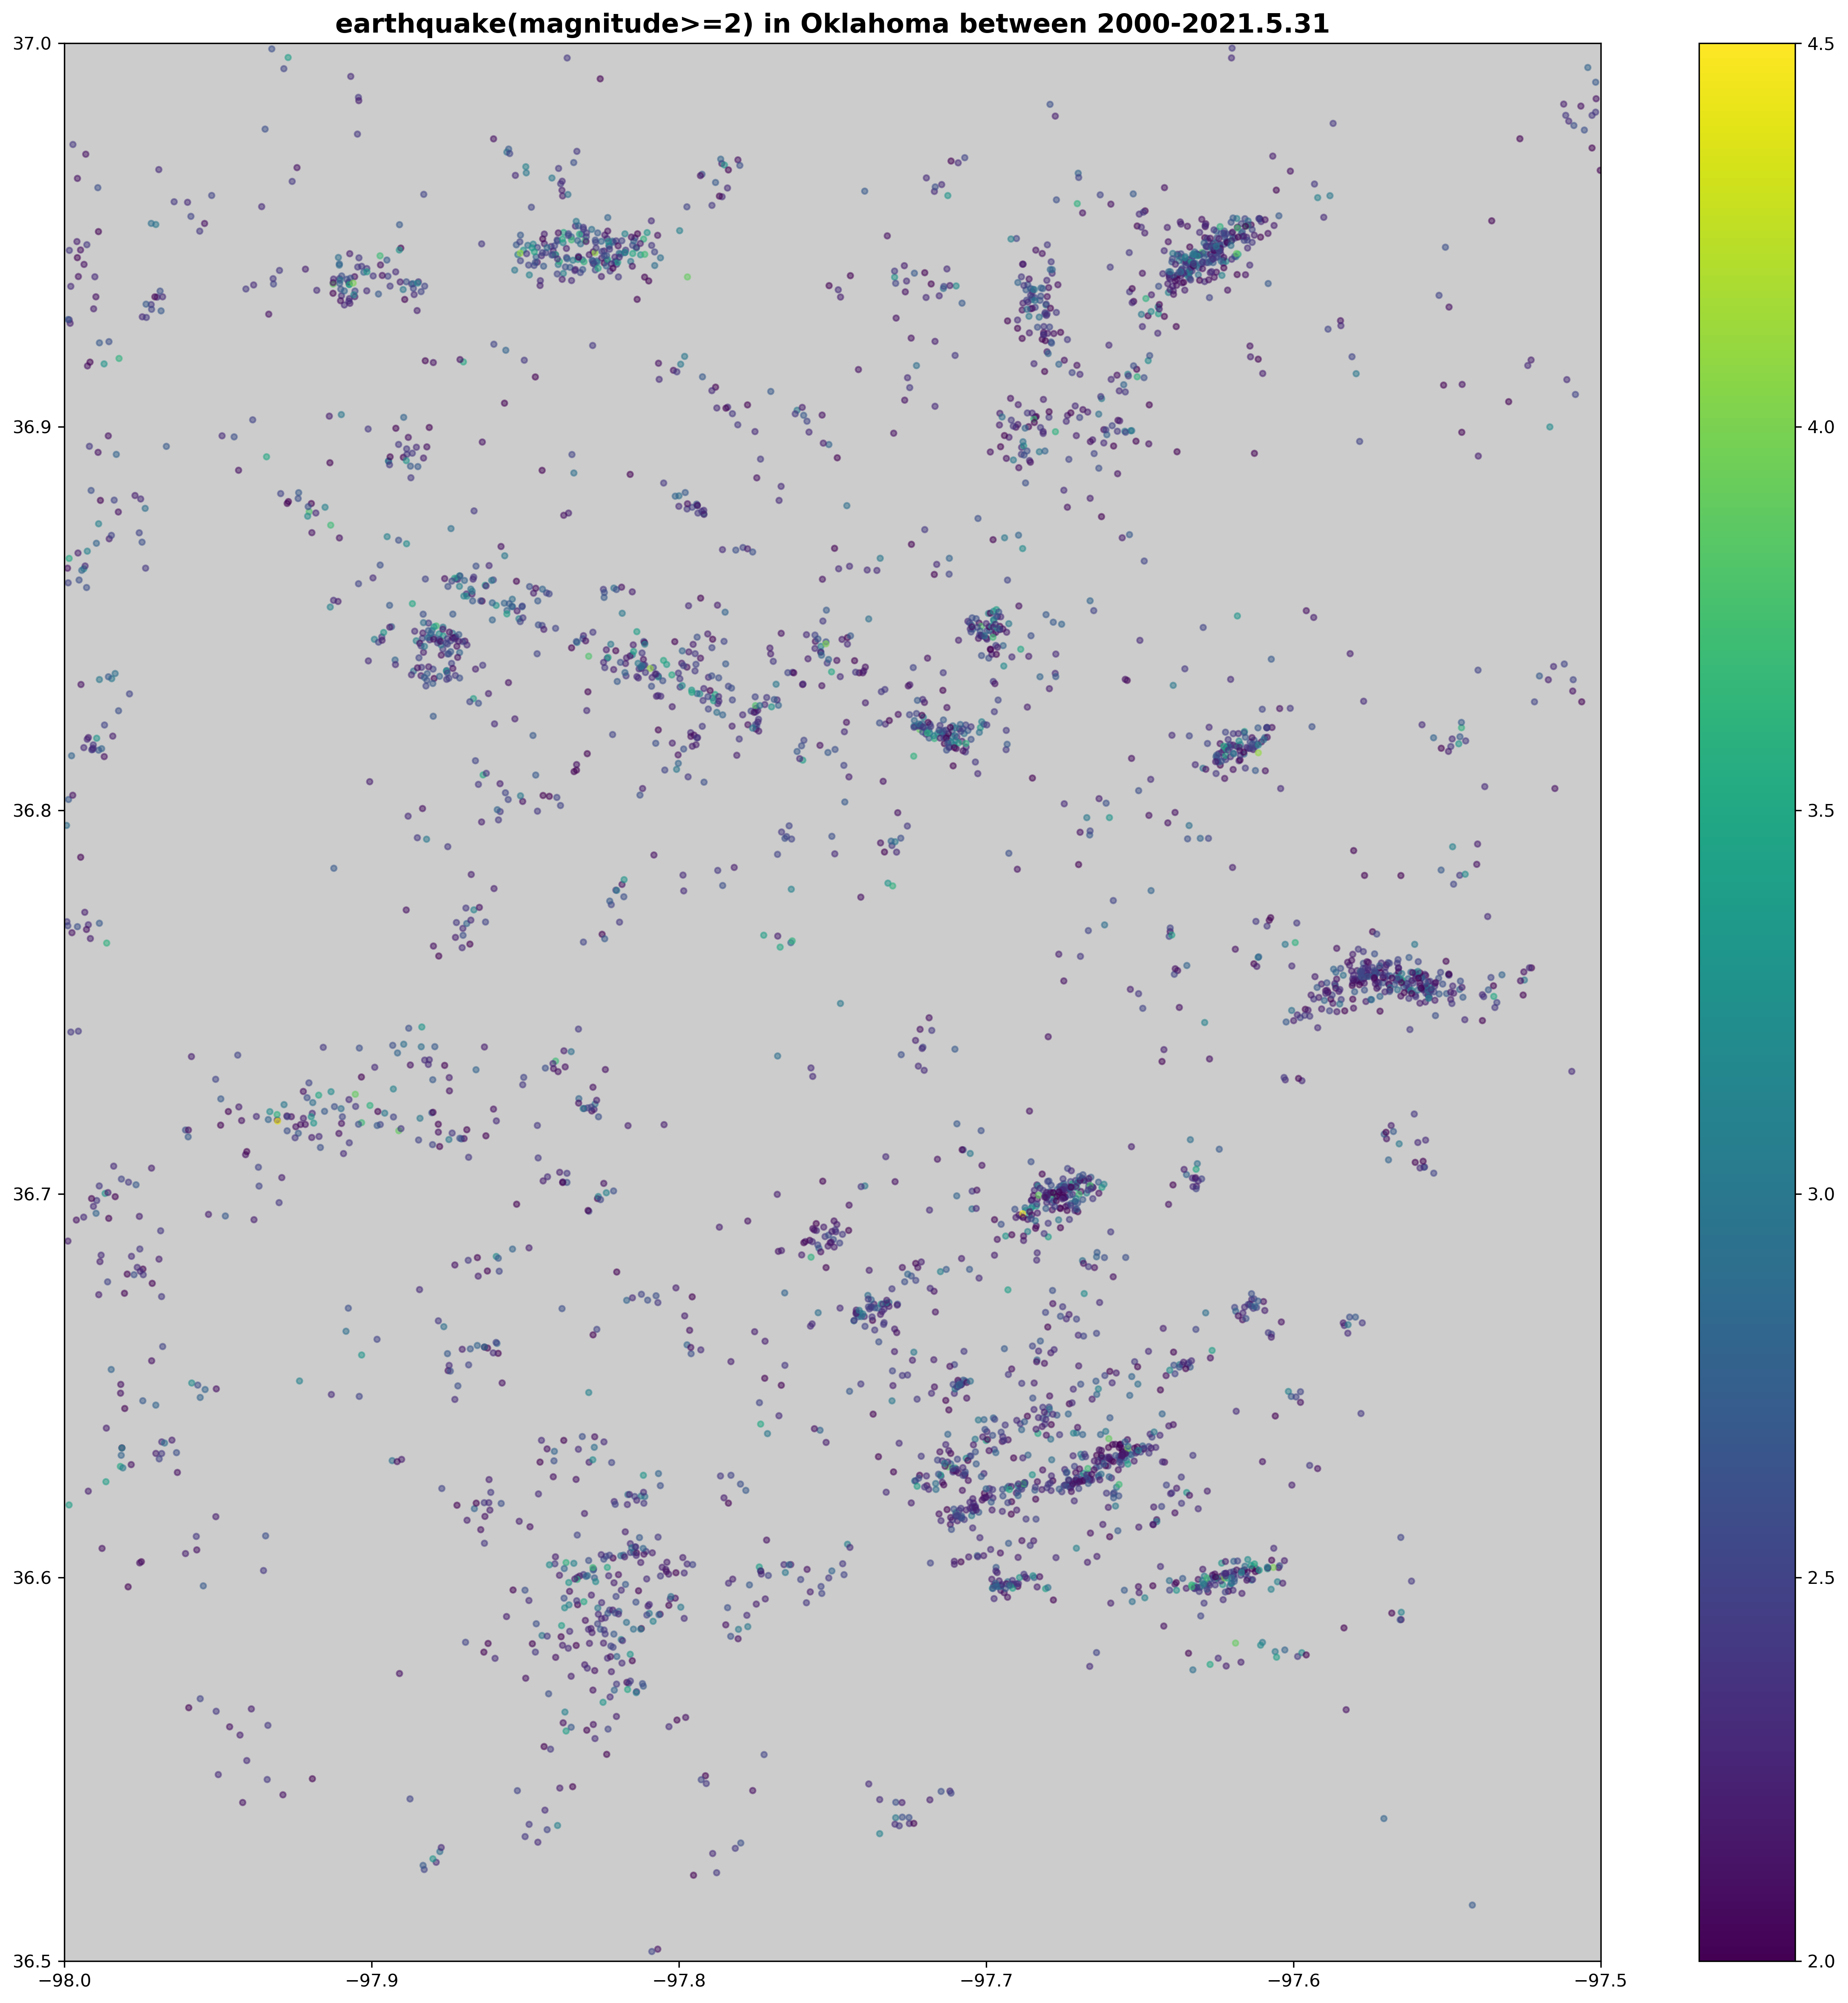

In [8]:
# earthquake 分布
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(20, 20), dpi=300)
# add .shp mapfile to axes
oklahoma_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘magnitude’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
earthquake_geo_df.plot(column='magnitude',ax=ax, alpha=0.5, legend=True, markersize=10)
# add title to graph
plt.title('earthquake(magnitude>=2) in Oklahoma between 2000-2021.5.31', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
# plt.xlim(-99.5, -96)
# plt.ylim(34.5, 38)
plt.xlim(-98, -97.5)
plt.ylim(36.5, 37)
# show map
plt.show()

# 计算2013-1-1 -- 2020-12-31内每月的地震数

In [9]:
earthquake_df = earthquake_df.set_index('origintime')

In [10]:
# 筛选某时间段地震记录
earthquake_dict = {}
month_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
for year in range(2013, 2021):
    for month in range(0,12):
        if month == 11:
            start = str(year) + "-" + month_list[month] + "-01"
            end = str(year+1) + "-" + month_list[0] + "-01"
        else:
            start = str(year) + "-" + month_list[month] + "-01"
            end = str(year) + "-" + month_list[month+1] + "-01"
        key = start[0:7]
        value = earthquake_df.loc[start:end].shape[0]
        earthquake_dict[key] = value

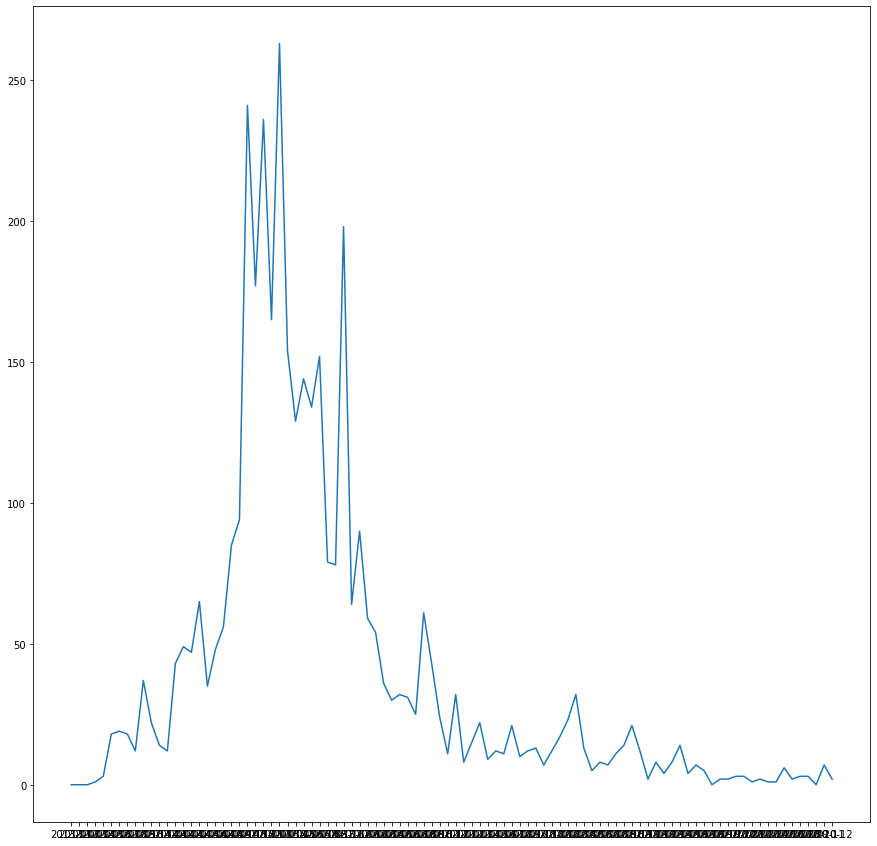

In [11]:
x = list(earthquake_dict.keys())
y_earthquake = list(earthquake_dict.values())
plt.figure(figsize=(15, 15))
plt.plot(x, y_earthquake)
plt.show()

# Injection Data

In [12]:
# injection data
inputdir = "datasets/OCC_injection_data/MonthlyInjectionRecords"
monthly_injection_df = pd.DataFrame()

for root, dirnames, filenames in os.walk(inputdir):
    for filename in filenames:
        df = pd.read_excel(os.path.join(root, filename))
        monthly_injection_df = monthly_injection_df.append(df, ignore_index=True)

In [13]:
monthly_injection_df.head()

API    Well_Name Well_Number  Operator_Number  \
0  3500321748  KRAFT #1-13           1            91827   
1  3500321748  KRAFT #1-13           1            91827   
2  3500321748  KRAFT #1-13           1            91827   
3  3500321748  KRAFT #1-13           1            91827   
4  3500321748  KRAFT #1-13           1            91827   

              Operator_Name Daily_Report_Date_Start Daily_Report_Date_End  \
0  SAND CREEK OPERATING LLC              2015-06-28            2020-03-29   
1  SAND CREEK OPERATING LLC              2015-06-28            2020-03-29   
2  SAND CREEK OPERATING LLC              2015-06-28            2020-03-29   
3  SAND CREEK OPERATING LLC              2015-06-28            2020-03-29   
4  SAND CREEK OPERATING LLC              2015-06-28            2020-03-29   

  Report_Date  Volume_BPD  Pressure_PSI   Latitude  Longitude DirArea  \
0  2018-12-31         0.0          15.0  36.901215 -98.446798    OWRA   
1  2018-12-30        17.0          15.0  36.901215 -98.446798    OWRA   
2  2018-12-29         0.0          15.0  36.901215 -98.446798    OWRA   
3  2018-12-28       100.0          15.0  36.901215 -98.446798    OWRA   
4  2018-12-27         0.0          15.0  36.901215 -98.446798    OWRA   

  Directive_Status  
0   NOT IN GRANITE  
1   NOT IN GRANITE  
2   NOT IN GRANITE  
3   NOT IN GRANITE  
4   NOT IN GRANITE

In [14]:
# 筛选区域
monthly_injection_df = monthly_injection_df[(monthly_injection_df['Latitude']>36.5)&(monthly_injection_df['Latitude']<37)&(monthly_injection_df['Longitude']>-98)&(monthly_injection_df['Longitude']<-97.5)]
# monthly_injection_df[(monthly_injection_df['Daily_Report_Date_Start']=='2016-03-27')&(monthly_injection_df['Daily_Report_Date_End']=='2020-03-15')].sort_values(by='Report_Date')
# 排序日期
monthly_injection_df.sort_values(by='Report_Date') #2012-12-21 -- 2020-12-31

API       Well_Name Well_Number  Operator_Number  \
1390138  3505323115         DOWNING       1 SWD           103155   
1390137  3505323115         DOWNING       1 SWD           103155   
1390136  3505323115         DOWNING       1 SWD           103155   
1390135  3505323115         DOWNING       1 SWD           103155   
1390134  3505323115         DOWNING       1 SWD           103155   
...             ...             ...         ...              ...   
1182211  3504724660  BLACK HOLE SWD           1            15003   
1202707  3505323050      WESLEY SWD         1-8            10377   
1178185  3504724534        ZALOUDEK    1-34 SWD           107783   
1207404  3505323327  BILLY SWD 2505        1-14            20357   
1177453  3504724516           TOEWS    1-15 SWD           107783   

                                  Operator_Name Daily_Report_Date_Start  \
1390138        EAGLE EXPLORATION PRODUCTION LLC              2012-12-16   
1390137        EAGLE EXPLORATION PRODUCTION LLC              2012-12-16   
1390136        EAGLE EXPLORATION PRODUCTION LLC              2012-12-16   
1390135        EAGLE EXPLORATION PRODUCTION LLC              2012-12-16   
1390134        EAGLE EXPLORATION PRODUCTION LLC              2012-12-16   
...                                         ...                     ...   
1182211                    CHAPARRAL ENERGY LLC              2014-12-28   
1202707             UNION VALLEY PETROLEUM CORP              2015-03-15   
1178185                         SK PLYMOUTH LLC              2014-12-28   
1207404  SANDRIDGE EXPLORATION & PRODUCTION LLC              2014-12-28   
1177453                         SK PLYMOUTH LLC              2014-12-28   

        Daily_Report_Date_End Report_Date  Volume_BPD  Pressure_PSI  \
1390138            2019-06-02  2012-12-21         0.0           0.0   
1390137            2019-06-02  2012-12-22         0.0           0.0   
1390136            2019-06-02  2012-12-23         0.0           0.0   
1390135            2019-06-02  2012-12-24         0.0           0.0   
1390134            2019-06-02  2012-12-25         0.0           0.0   
...                       ...         ...         ...           ...   
1182211            2021-03-21  2020-12-31         0.0           0.0   
1202707            2021-03-21  2020-12-31       705.0           0.0   
1178185            2021-03-21  2020-12-31      2805.0           0.0   
1207404            2021-03-21  2020-12-31         0.0           0.0   
1177453            2021-03-21  2020-12-31         0.0          12.0   

          Latitude  Longitude DirArea      Directive_Status  
1390138  36.840319 -97.819774    OWRA  NOT AN ARBUCKLE WELL  
1390137  36.840319 -97.819774    OWRA  NOT AN ARBUCKLE WELL  
1390136  36.840319 -97.819774    OWRA  NOT AN ARBUCKLE WELL  
1390135  36.840319 -97.819774    OWRA  NOT AN ARBUCKLE WELL  
1390134  36.840319 -97.819774    OWRA  NOT AN ARBUCKLE WELL  
...            ...        ...     ...                   ...  
1182211  36.549892 -97.508606    OCRA                REVIEW  
1202707  36.918901 -97.767722    OWRA                REVIEW  
1178185  36.507142 -97.727079    OWRA        NOT IN GRANITE  
1207404  36.650558 -97.709514    OWRA          PLUGGED BACK  
1177453  36.562985 -97.617946    OWRA        NOT IN GRANITE  

[137672 rows x 14 columns]

In [17]:
# designate coordinate system
crs = {'init':'epsg:4326'}

# zip x and y coordinates into single feature
injection_geometry = [Point(xy) for xy in zip(monthly_injection_df['Longitude'], monthly_injection_df['Latitude'])]

# create GeoPandas dataframe
injection_geo_df = gpd.GeoDataFrame(monthly_injection_df, crs = crs, geometry = injection_geometry)

/Users/zhiyongliu/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


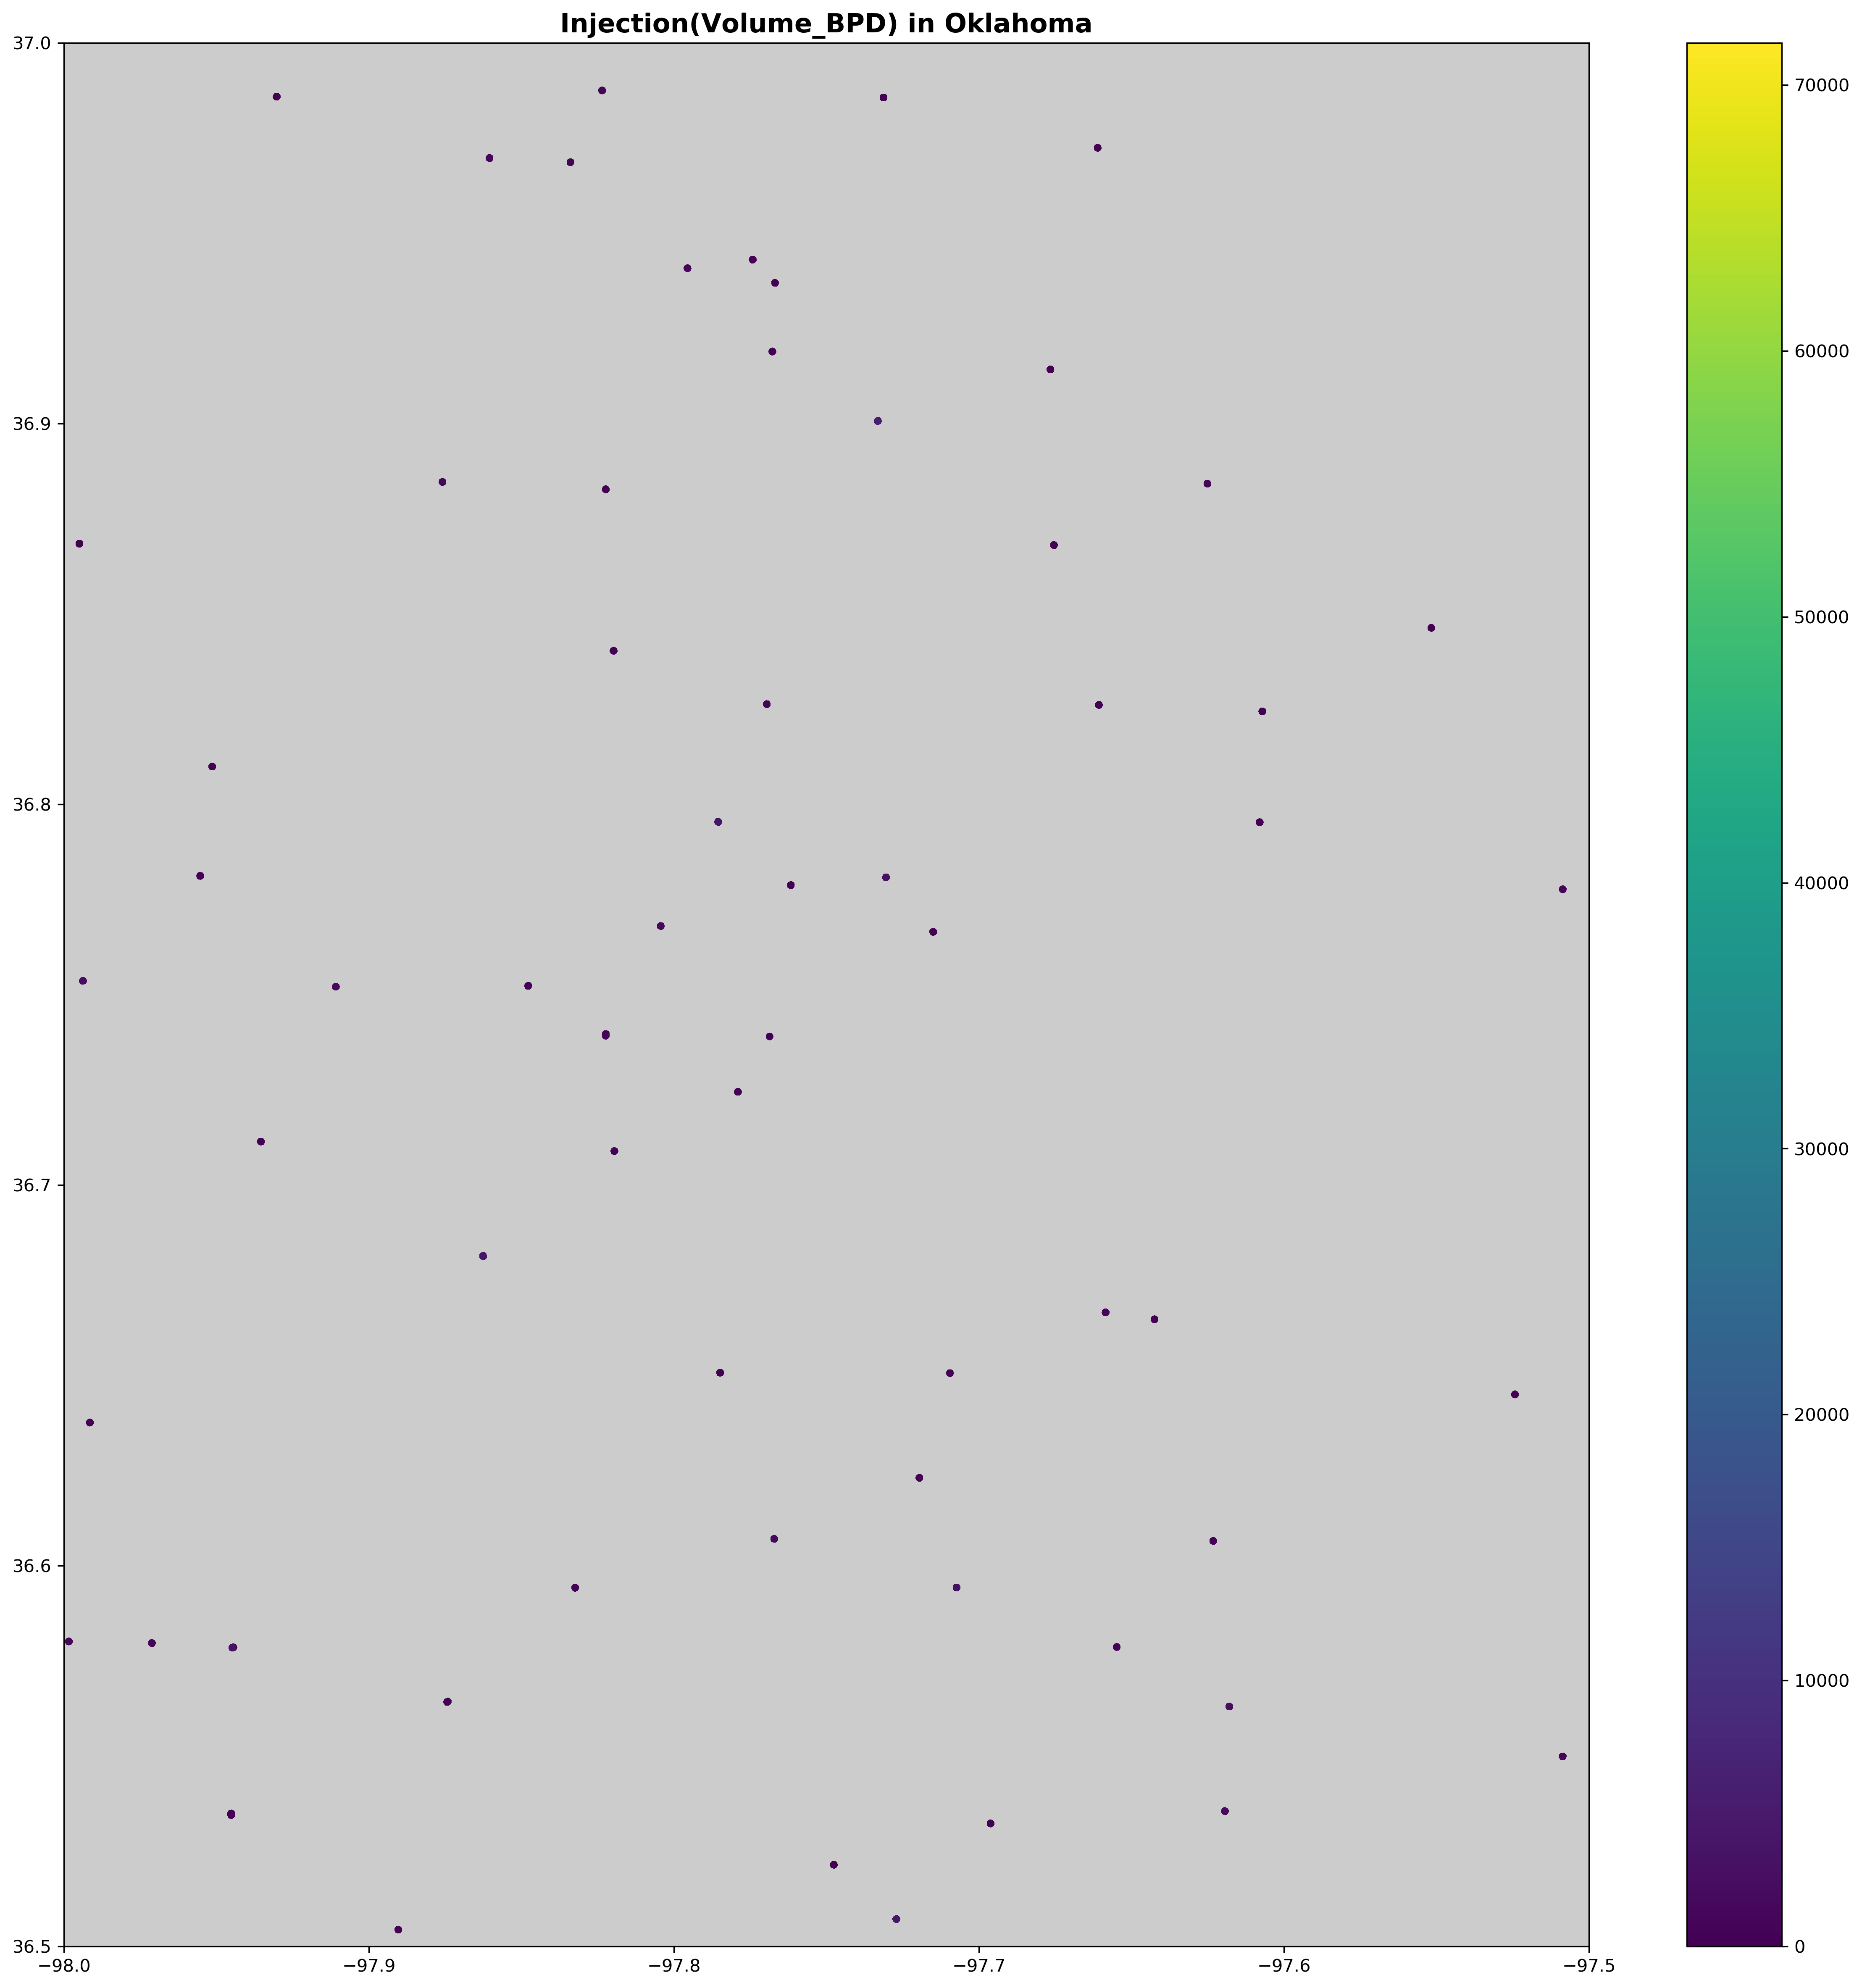

In [18]:
# Injection 分布
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(20, 20), dpi=300)
# add .shp mapfile to axes
oklahoma_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘Volume_BPD’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
injection_geo_df.plot(column='Volume_BPD',ax=ax, alpha=0.5, legend=True, markersize=10)
# add title to graph
plt.title('Injection(Volume_BPD) in Oklahoma', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
# plt.xlim(-103.5, -94)
# plt.ylim(33, 39)
plt.xlim(-98, -97.5)
plt.ylim(36.5, 37)
# show map
plt.show()

# 计算2013-1-1 -- 2020-12-31内每月的注射量

In [19]:
monthly_injection_df = monthly_injection_df.set_index('Report_Date')

In [76]:
# 筛选某时间段地震记录
monthly_injection_dict = {}
month_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
for year in range(2013, 2021):
    for month in range(0,12):
        if month == 11:
            start = str(year) + "-" + month_list[month] + "-01"
            end = str(year+1) + "-" + month_list[0] + "-01"
        else:
            start = str(year) + "-" + month_list[month] + "-01"
            end = str(year) + "-" + month_list[month+1] + "-01"
        key = start[0:7]
        value = monthly_injection_df.loc[start:end]['Volume_BPD'].sum()
        monthly_injection_dict[key] = value

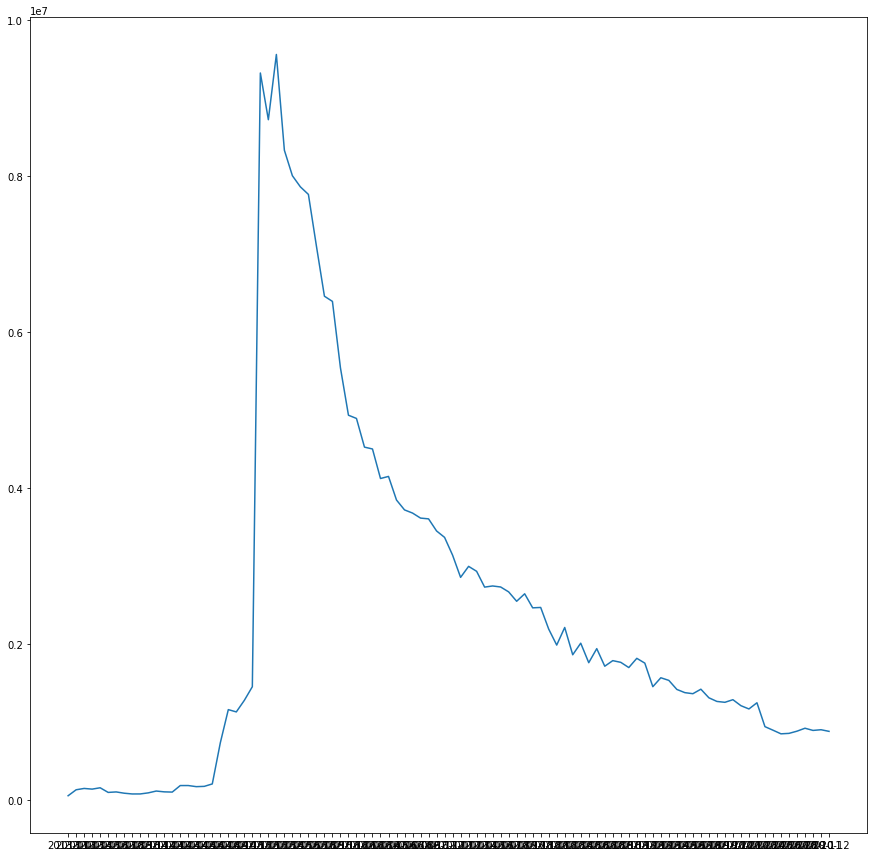

In [77]:
x = list(monthly_injection_dict.keys())
y_injection = list(monthly_injection_dict.values())
plt.figure(figsize=(15, 15))
plt.plot(x,y_injection)
plt.show()

In [22]:
data = pd.DataFrame({'injection': pd.Series(y_injection, index=x),
        'earthquake': pd.Series(y_earthquake, index=x)})

# injection 与 地震每月次数 的回归分析

In [36]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
rawData = data.copy(deep=True)

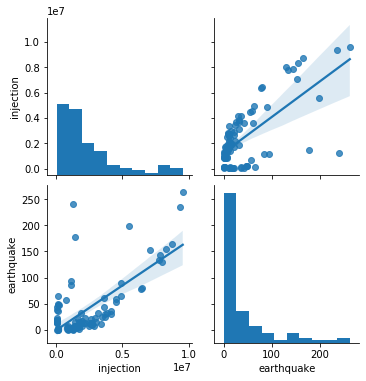

In [51]:
sns.pairplot(rawData, kind="reg", diag_kind="hist")

In [52]:
rawData.corr(method='pearson') #pearson

injection  earthquake
injection     1.00000     0.69268
earthquake    0.69268     1.00000

In [53]:
rawData.corr(method='spearman') #spearman

injection  earthquake
injection    1.000000    0.491244
earthquake   0.491244    1.000000

In [68]:
from sklearn.metrics import r2_score 

In [59]:
x = rawData['injection'].values.reshape(-1, 1)
y = rawData['earthquake']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
print(model.coef_)
print(model.intercept_)

[1.90803956e-05]
-4.028813967585336


In [39]:
# pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

In [40]:
predictions = model.predict(x_test)

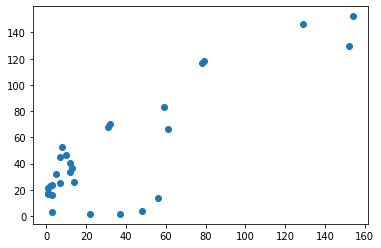

In [41]:
plt.scatter(y_test, predictions)

(array([7., 2., 7., 5., 1., 2., 0., 2., 0., 3.]),
 array([-44.32426222, -35.485821  , -26.64737977, -17.80893854,
         -8.97049731,  -0.13205609,   8.70638514,  17.54482637,
         26.38326759,  35.22170882,  44.06015005]),
 <a list of 10 Patch objects>)

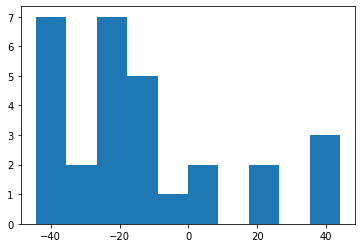

In [42]:
plt.hist(y_test - predictions)

In [43]:
from sklearn import metrics

In [44]:
# 平均绝对误差
metrics.mean_absolute_error(y_test, predictions)

24.95230148579363

In [45]:
# 均方误差
metrics.mean_squared_error(y_test, predictions)

775.7048594591283

In [46]:
# 均方根误差
np.sqrt(metrics.mean_squared_error(y_test, predictions))

27.851478586587255

In [69]:
print('r2_score: %.2f'
      % r2_score(y_test, predictions))

r2_score: -1.92


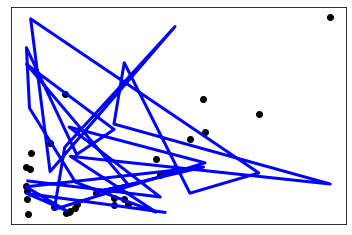

In [73]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, predictions, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

# injection 与 是否发生地震 的逻辑回归分析

In [79]:
# 筛选每月地震记录
earthquake_dict = {}
month_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
for year in range(2013, 2021):
    for month in range(0,12):
        if month == 11:
            start = str(year) + "-" + month_list[month] + "-01"
            end = str(year+1) + "-" + month_list[0] + "-01"
        else:
            start = str(year) + "-" + month_list[month] + "-01"
            end = str(year) + "-" + month_list[month+1] + "-01"
        key = start[0:7]
        times = earthquake_df.loc[start:end].shape[0]
        earthquake_dict[key] = 1 if times > 0 else 0

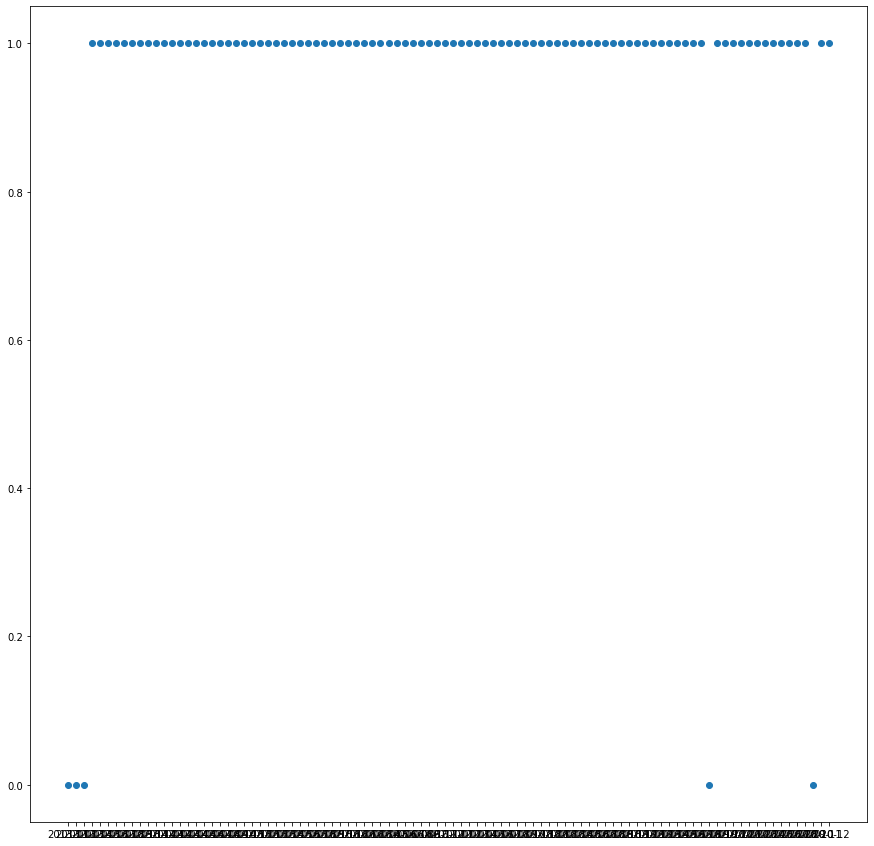

In [86]:
x = list(earthquake_dict.keys())
y_earthquake = list(earthquake_dict.values())
plt.figure(figsize=(15, 15))
plt.plot(x, y_earthquake, 'o')
plt.show()

In [82]:
# 筛选某时间段地震记录
monthly_injection_dict = {}
month_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
for year in range(2013, 2021):
    for month in range(0,12):
        if month == 11:
            start = str(year) + "-" + month_list[month] + "-01"
            end = str(year+1) + "-" + month_list[0] + "-01"
        else:
            start = str(year) + "-" + month_list[month] + "-01"
            end = str(year) + "-" + month_list[month+1] + "-01"
        key = start[0:7]
        value = monthly_injection_df.loc[start:end]['Volume_BPD'].sum()
        monthly_injection_dict[key] = value

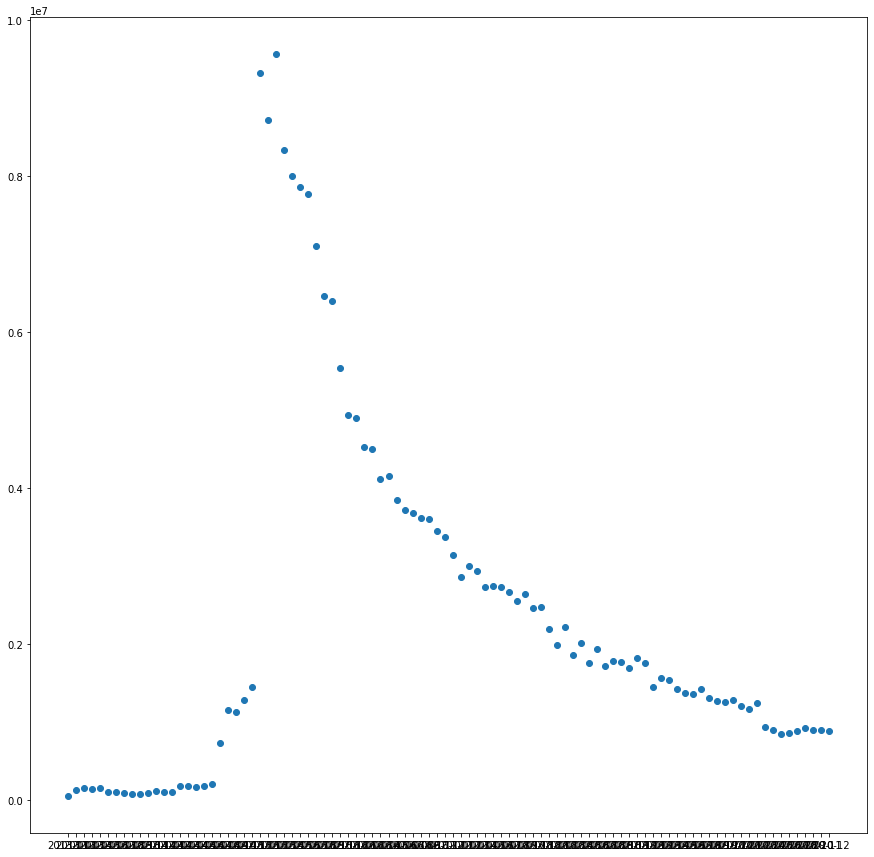

In [87]:
x = list(monthly_injection_dict.keys())
y_injection = list(monthly_injection_dict.values())
plt.figure(figsize=(15, 15))
plt.plot(x,y_injection, 'o')
plt.show()

In [92]:
data = pd.DataFrame({'injection': pd.Series(y_injection, index=x),
        'earthquake': pd.Series(y_earthquake, index=x)})

rawData = data.copy(deep=True)
rawData

injection  earthquake
2013-01    51767.0           0
2013-02   128187.0           0
2013-03   145271.0           0
2013-04   136650.0           1
2013-05   153844.0           1
...            ...         ...
2020-08   879533.0           1
2020-09   917317.0           1
2020-10   889190.0           0
2020-11   898090.0           1
2020-12   877213.0           1

[96 rows x 2 columns]

In [95]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(rawData['injection'], rawData['earthquake'], test_size = 0.3)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
model.score(x_test, y_test)

0.9655172413793104

In [101]:
y_test.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1])

In [98]:
model.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

# Granger Causality

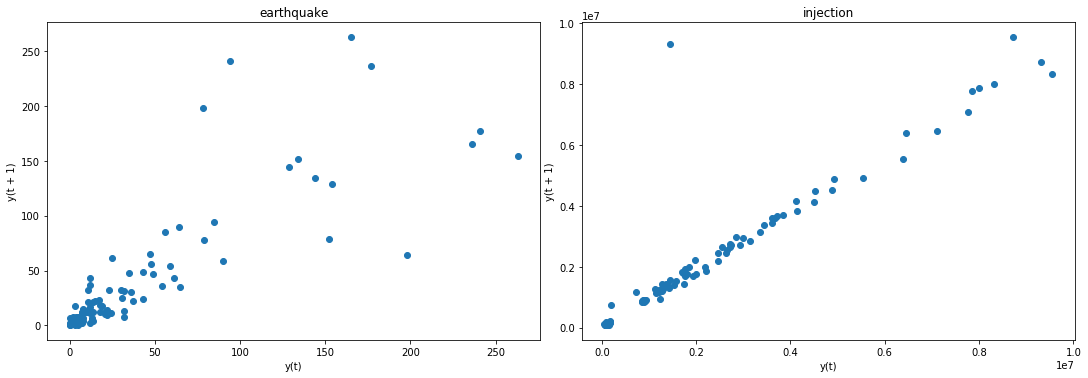

In [336]:
from pandas.plotting import lag_plot

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
f1.tight_layout()

lag_plot(data['earthquake'], ax=ax1)
ax1.set_title('earthquake')

lag_plot(data['injection'], ax=ax2)
ax2.set_title('injection')

plt.show()

Result: Data is not stationary. We will have to make it stationary using difference operation

In [285]:
#difference operation for sttionarity
rawData = data.copy(deep=True)

data['injection'] = data['injection'] - data['injection'].shift(1)
data['earthquake'] = data['earthquake'] - data['earthquake'].shift(1)
data = data.dropna()

In [288]:
# split data into train and test. We will need this later for VAR analysis
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [289]:
## ADF Null hypothesis: there is a unit root, meaning series is non-stationary
from statsmodels.tsa.stattools import adfuller

X1 = np.array(data['earthquake'])
X1 = X1[~np.isnan(X1)]

result = adfuller(X1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
    
X2 = np.array(data['injection'])
X2 = X2[~np.isnan(X2)]

result = adfuller(X2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.194655
p-value: 0.000000
Critical Values:
	1%: -3.510
	5%: -2.896
	10%: -2.585
ADF Statistic: -8.514923
p-value: 0.000000
Critical Values:
	1%: -3.505
	5%: -2.894
	10%: -2.584


In [291]:
## KPSS Null hypothesis: there is a no unit root, meaning series is stationary
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(X1)
kpss_test(X2)

KPSS Statistic: 0.059151754921079484
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.06584304066226286
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/Users/zhiyongliu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/zhiyongliu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


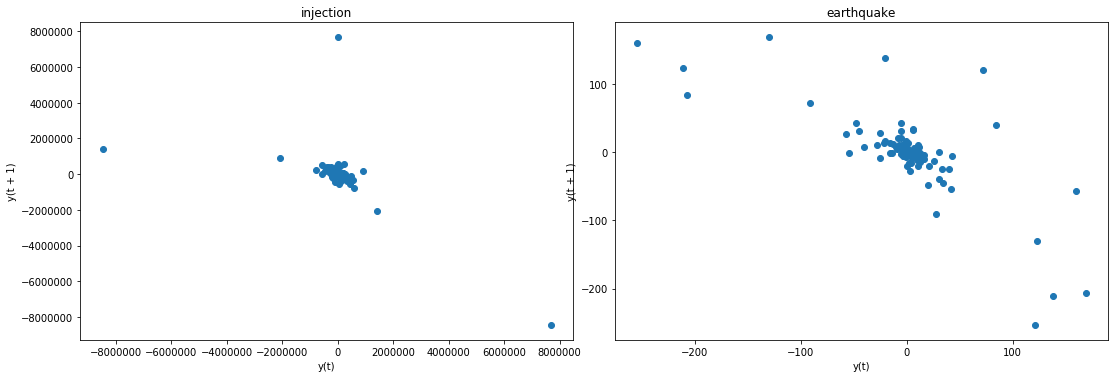

In [294]:
from pandas.plotting import lag_plot
   
f2, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 5))
f2.tight_layout()

lag_plot(data['injection'], ax=ax3)
ax3.set_title('injection');

lag_plot(data['earthquake'], ax=ax4)
ax4.set_title('earthquake');

#lag_plot(series3, ax=ax6)
#ax6.set_title('Tweet and PM2.5');

plt.show()

Result: lag plot is in confirmatory with ADF test and KPSS test|

In [304]:
from statsmodels.tsa.api import VAR

# obtain the lag P for VAR
rawData = rawData.dropna()
model = VAR(rawData) #recall that rawData is w/o difference operation
for i in range(1, 13):
    result = model.fit(i)
    try:
        print('Lag Order =', i)
        print('AIC : ', result.aic)
        print('BIC : ', result.bic)
        print('FPE : ', result.fpe)
        print('HQIC: ', result.hqic, '\n')
    except:
        continue

Lag Order = 1
AIC :  34.044772492566565
BIC :  34.20711045739231
FPE :  610204865669033.5
HQIC:  34.11034514854239 

Lag Order = 2
AIC :  33.77936644010685
BIC :  34.05168896625236
FPE :  468039591294269.2
HQIC:  33.889322486227314 

Lag Order = 3
AIC :  33.752757994754525
BIC :  34.136508430392425
FPE :  455924050639610.6
HQIC:  33.90764292211233 

Lag Order = 4
AIC :  33.62878556060427
BIC :  34.12543908936585
FPE :  403050525089607.9
HQIC:  33.8291543263048 

Lag Order = 5
AIC :  33.62670414124101
BIC :  34.237768727321736
FPE :  402678897991510.75
HQIC:  33.873121301436385 

Lag Order = 6
AIC :  33.64540779168152
BIC :  34.37242515812012
FPE :  411001127921698.56
HQIC:  33.93844762867714 

Lag Order = 7
AIC :  33.68084870466749
BIC :  34.52539534596688
FPE :  426899448154980.7
HQIC:  34.02109534690219 

Lag Order = 8
AIC :  33.678174697179145
BIC :  34.64186292745795
FPE :  427235635257635.8
HQIC:  34.06622223072619 

Lag Order = 9
AIC :  33.71015082576675
BIC :  34.794629863646215

/Users/zhiyongliu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Result: The lag-order p = 12 on the basis of Akaike Information Criterion (AIC)

In [305]:
model = VAR(train)
model_fitted = model.fit(2)

/Users/zhiyongliu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [306]:
#Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic
#The value of this statistic can vary between 0 and 4. 
#The closer it is to the value 2, then there is no significant serial correlation. 
#The closer to 0, there is a positive serial correlation, 
#and the closer it is to 4 implies negative serial correlation.


from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(data.columns, out):
    print(col, ':', round(val, 2))

injection : 2.15
earthquake : 2.04


Result: There is no significant correlation between in the residuals

In [307]:
# I could not perform Johansen's test. Instead I check for co-integration using t-statistics

import statsmodels.tsa.stattools as ts 
result=ts.coint(data['injection'], data['earthquake'])
print(result)

(-8.608838417991093, 8.678382706766229e-13, array([-4.01807877, -3.40261888, -3.09036879]))


Result: The p-valus < 0.05. Thus rejecting the null hypothesis. Thus they are cointegrated.

In [308]:
model = VAR(train)
model_fitted = model.fit(2)
#get the lag order
lag_order = model_fitted.k_ar
print(lag_order)

2


/Users/zhiyongliu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [309]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=lag_order #becuase we got this value before. We are not suppose to add 1 to it
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

o = grangers_causation_matrix(train, variables = train.columns)  

In [310]:
o

injection_x  earthquake_x
injection_y        1.0000         0.121
earthquake_y       0.0072         1.000

# 回归分析

In [337]:
rawData = data.copy(deep=True)

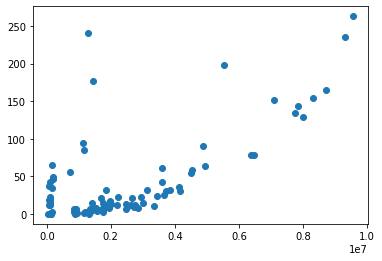

In [338]:
plt.scatter(rawData['injection'], rawData['earthquake'])

In [339]:
rawData.corr()

injection  earthquake
injection     1.00000     0.69268
earthquake    0.69268     1.00000

In [349]:
from sklearn.linear_model import LinearRegression

In [356]:
x = rawData['injection'].values.reshape(-1, 1)
y = rawData['earthquake'].values
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [358]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.4798052526638249
intercept: -1.2050025095862509
slope: [1.71601329e-05]


In [359]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[-3.16673912e-01  9.94703441e-01  1.28786715e+00  1.13992965e+00
  1.43498097e+00  4.15205755e-01  5.20843532e-01  2.40464122e-01
  7.38220715e-02  7.84038270e-02  3.12279278e-01  7.15405119e-01
  5.37866384e-01  4.86265865e-01  1.92232874e+00  1.92713358e+00
  1.68170936e+00  1.74537345e+00  2.28209093e+00  1.13140866e+01
  1.86294513e+01  1.81261617e+01  2.06691390e+01  2.36725393e+01
  1.58700250e+02  1.48423004e+02  1.62776270e+02  1.41700392e+02
  1.36098045e+02  1.33642913e+02  1.31985534e+02  1.20627479e+02
  1.09586238e+02  1.08446084e+02  9.38317601e+01  8.34033758e+01
  8.26954860e+01  7.63832684e+01  7.59761785e+01  6.94792493e+01
  6.99381627e+01  6.47411821e+01  6.25717810e+01  6.18764696e+01
  6.07695895e+01  6.05997728e+01  5.79399008e+01  5.65264549e+01
  5.26163299e+01  4.77307714e+01  5.01500756e+01  4.90620374e+01
  4.55870762e+01  4.58347312e+01  4.56130566e+01  4.45356920e+01
  4.24685481e+01  4.41135870e+01  4.10264620e+01  4.11079383e+01
  3.6

# Well data

In [103]:
# well data
inputdir = "datasets/WellData/"
well_df = pd.read_csv(inputdir + "Export - Excel Well Workbook_Header.csv")

/Users/zhiyongliu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (24,28,31,33,42,46,48,49,50,55,58,62,70,73,76) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [104]:
well_df.columns

Index(['UWI', 'Source', 'API Number', 'IC Number', 'Regulatory API',
       'Operator Name', 'Operator City', 'Current Operator Name',
       'Current Operator City', 'Lease Name', 'Alternate Well Name',
       'Well Num', 'Field Name', 'Country Name', 'State Name', 'County Name',
       'OS Indicator', 'Hole Direction', 'Final Status', 'Current Status',
       'Regulatory Status', 'Regulatory Status Date', 'Basin', 'Basin Code',
       'Sub Basin', 'Sub Basin Code', 'Play Name', 'Play Type',
       'Permit Number', 'Permit Date', 'Permit Status', 'Permit Reissue Date',
       'Lease Acres', 'Unit of Measure', 'Depth Total Driller',
       'Depth Total Logger', 'Depth True Vertical', 'Depth Whipstock',
       'Class Initial Name', 'Class Initial Code', 'Class Final Name',
       'Class Final Code', 'Status Final Code', 'Formation Projected Name',
       'Depth Total Projected', 'Formation at TD Name',
       'PRODFit Formation at TD Name', 'Formation Producing Name',
       'PRODFit To

In [48]:
print(well_df[['Surface Latitude', 'Surface Longitude']].max())
print(well_df[['Surface Latitude', 'Surface Longitude']].min())

Surface Latitude     37.999929
Surface Longitude   -96.000005
dtype: float64
Surface Latitude     35.000023
Surface Longitude   -99.499960
dtype: float64


In [92]:
# designate coordinate system
crs = {'init':'epsg:4326'}

# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(well_df['Surface Longitude'], well_df['Surface Latitude'])]

# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(well_df, crs = crs, geometry = geometry)

In [102]:
geo_df.head()

NameError: name 'geo_df' is not defined

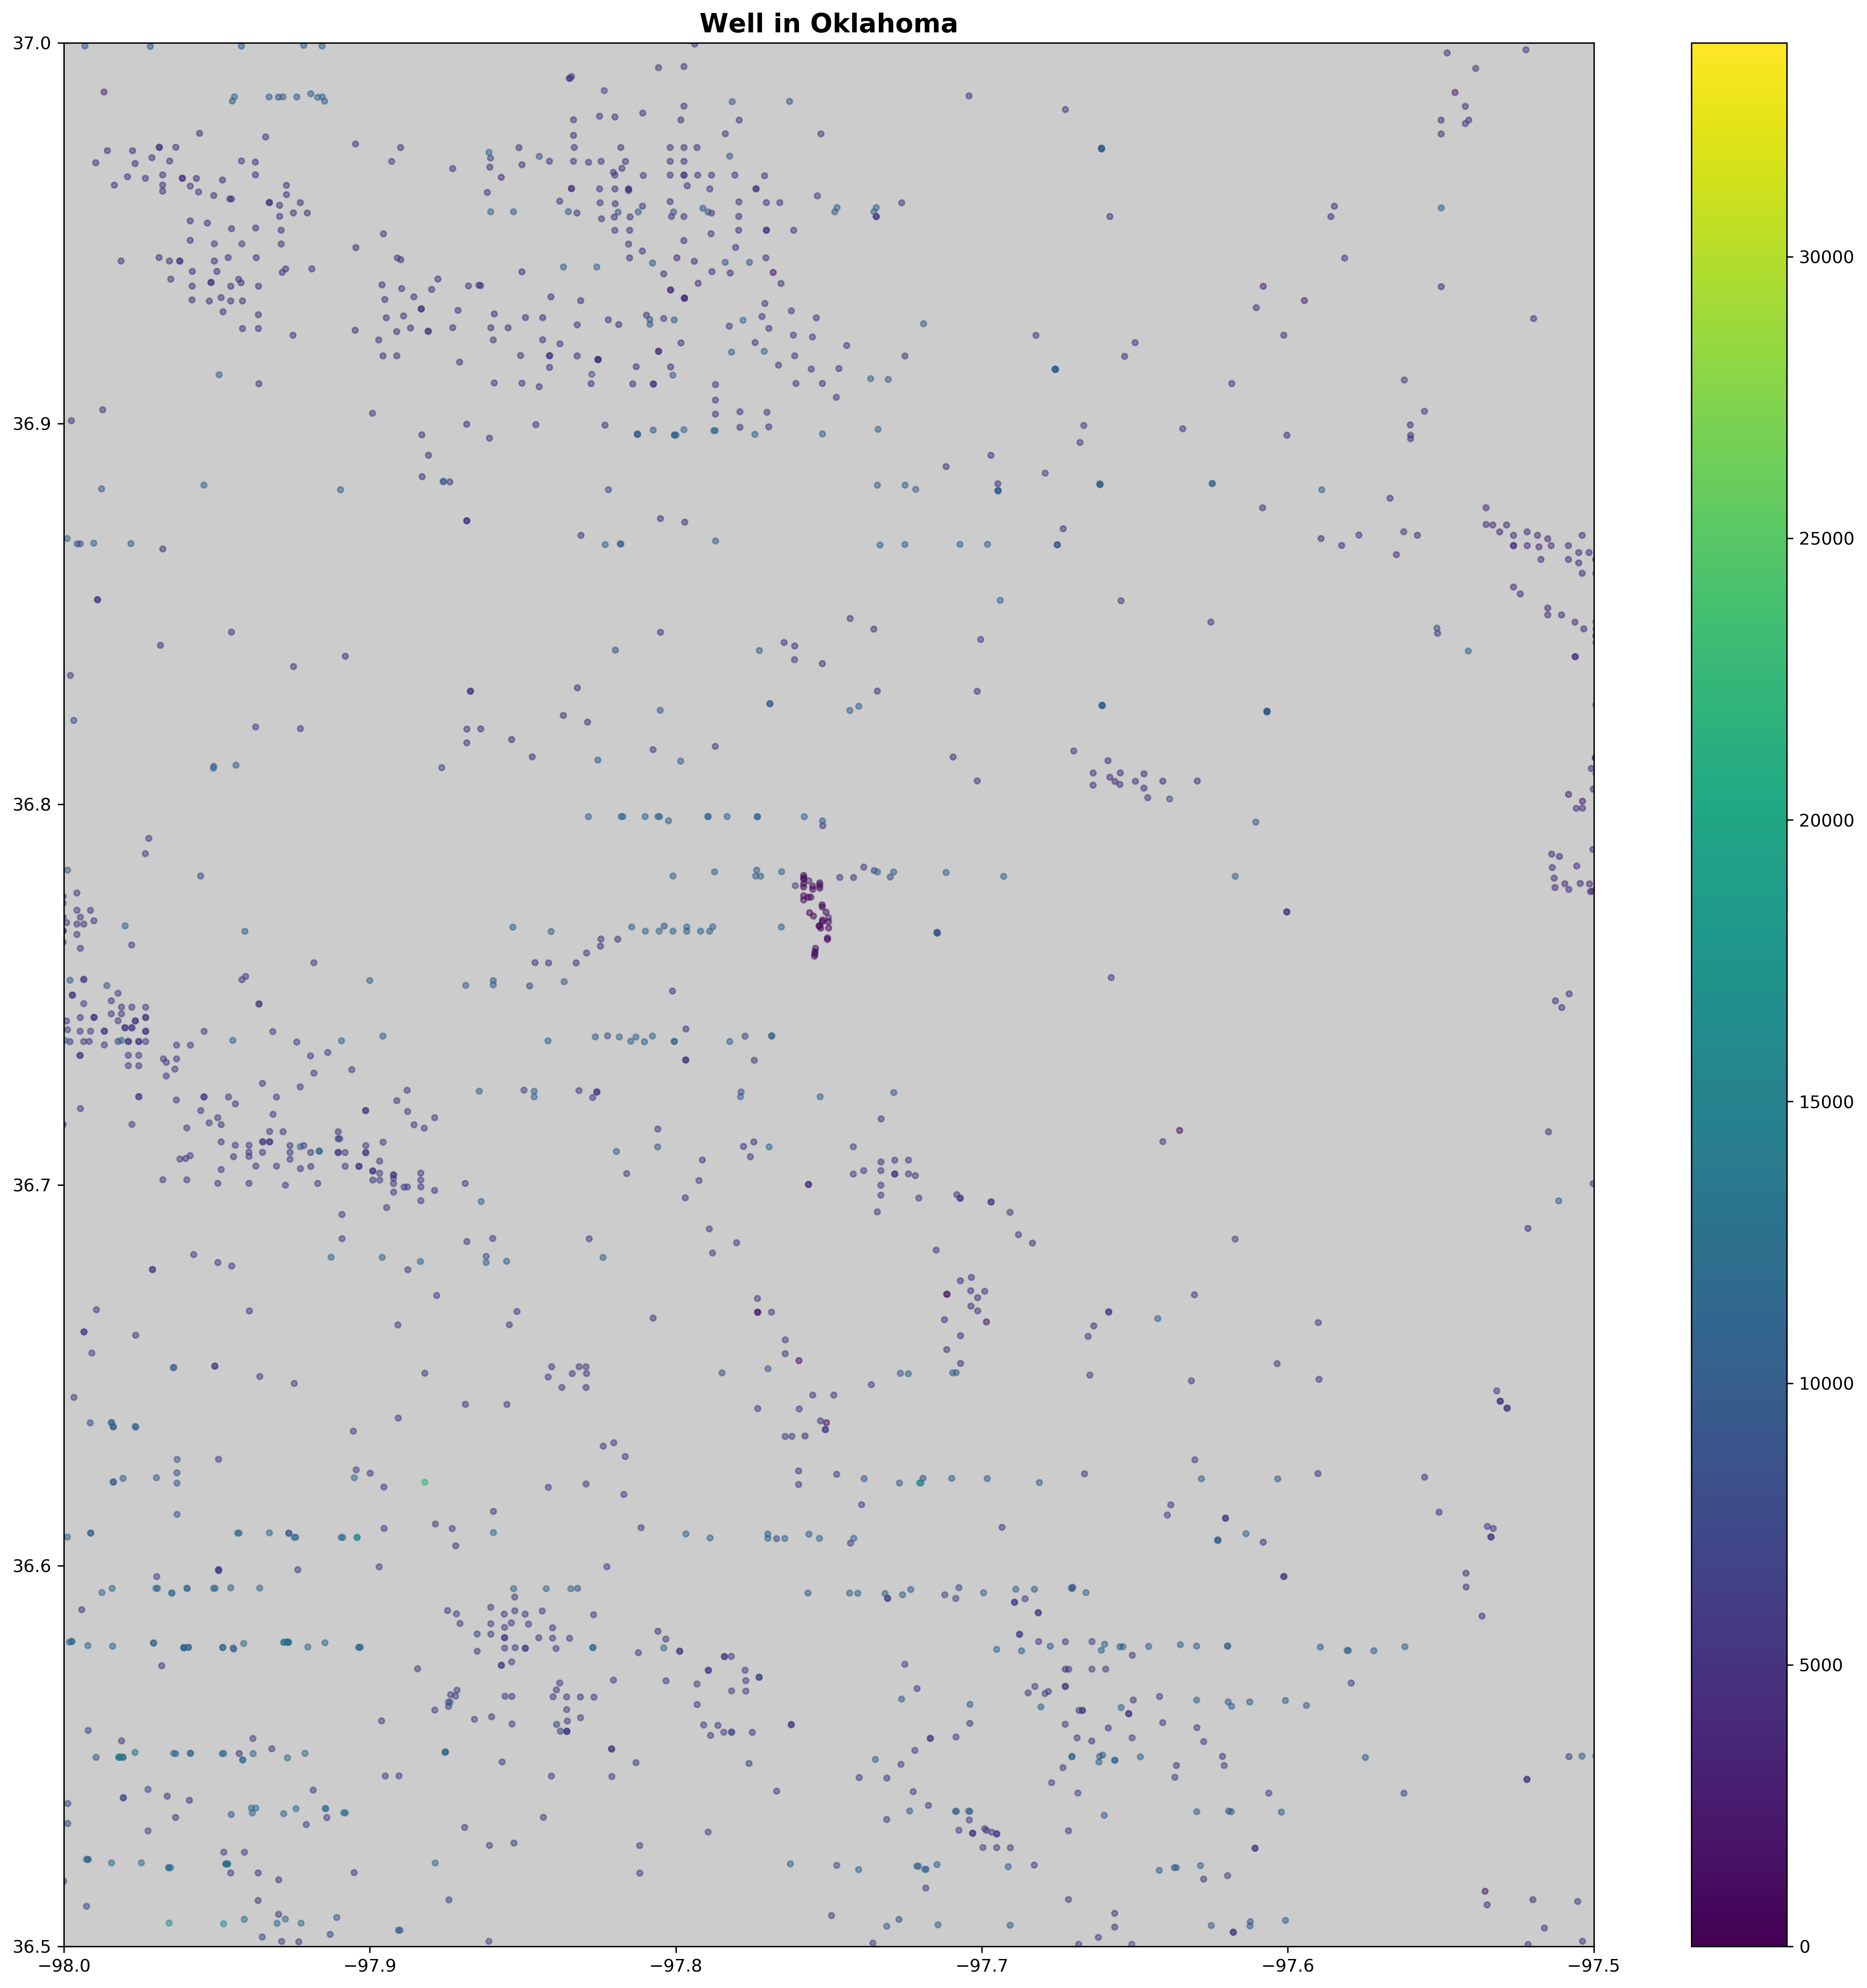

In [348]:
# well 分布
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(20, 20), dpi=300)
# add .shp mapfile to axes
oklahoma_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘Depth Total Projected’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='Depth Total Projected',ax=ax, alpha=0.5, legend=True, markersize=10)
# add title to graph
plt.title('Well in Oklahoma', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
# plt.xlim(-103.5, -94)
# plt.ylim(33, 39)
plt.xlim(-98, -97.5)
plt.ylim(36.5, 37)
# show map
plt.show()